In [135]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error,max_error
from sklearn.utils import shuffle
import matplotlib.pyplot as plt


In [114]:
dataset=pd.read_csv('emdat_with_precipitation.csv')
dataset.head()

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,...,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Rainfall-MM
0,1906-0023-BEL,1906,23,Natural,Hydrological,Flood,NaN,NaN,NaN,Govern,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.522300,91.8369
1,1906-0024-BEL,1906,24,Natural,Hydrological,Flood,NaN,NaN,NaN,Govern,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.522300,34.7374
2,1926-0008-IND,1926,8,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,OFDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.940236,294.4590
3,1927-0012-DZA,1927,12,Natural,Hydrological,Flood,NaN,NaN,NaN,Kill,...,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.809780,20.3177
4,1928-0018-IND,1928,18,Natural,Hydrological,Flood,NaN,NaN,NaN,Kill,...,36.0,NaN,NaN,2000.0,2000.0,NaN,NaN,NaN,6.731507,108.1400


In [115]:
#deleting columns with nans only 
for column in dataset.columns:
    if dataset[column].isnull().all():
        del dataset[column]

In [116]:
dataset.head()

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Event Name,Entry Criteria,Country,...,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Rainfall-MM
0,1906-0023-BEL,1906,23,Natural,Hydrological,Flood,NaN,NaN,Govern,Belgium,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.522300,91.8369
1,1906-0024-BEL,1906,24,Natural,Hydrological,Flood,NaN,NaN,Govern,Belgium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.522300,34.7374
2,1926-0008-IND,1926,8,Natural,Hydrological,Flood,Riverine flood,NaN,OFDA,India,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.940236,294.4590
3,1927-0012-DZA,1927,12,Natural,Hydrological,Flood,NaN,NaN,Kill,Algeria,...,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.809780,20.3177
4,1928-0018-IND,1928,18,Natural,Hydrological,Flood,NaN,NaN,Kill,India,...,36.0,NaN,NaN,2000.0,2000.0,NaN,NaN,NaN,6.731507,108.1400


In [117]:
nb_floods_year_region=dataset[['Year','Region','Dis No']].groupby(by=['Region','Year']).count()
nb_floods_year_region.head(20)

Dis No
Region                    Year        
Australia and New Zealand 1938       1
                          1955       1
                          1971       1
                          1973       1
                          1974       1
                          1975       1
                          1976       2
                          1977       2
                          1978       5
                          1980       2
                          1981       4
                          1983       1
                          1984       2
                          1985       3
                          1986       4
                          1987       1
                          1988       5
                          1989       2
                          1990       2
                          1991       3

In [118]:
Rainfall_year_region=dataset[['Year','Region','Rainfall-MM']].groupby(by=['Region','Year']).sum()
Rainfall_year_region.head(20)

Rainfall-MM
Region                    Year             
Australia and New Zealand 1938     211.8300
                          1955     108.1940
                          1971      77.0188
                          1973      86.5495
                          1974     219.8190
                          1975      66.2571
                          1976     279.7542
                          1977     239.1561
                          1978     605.3286
                          1980     365.5460
                          1981     413.1616
                          1983     151.3620
                          1984     201.0521
                          1985     325.5667
                          1986     462.4970
                          1987     202.7670
                          1988     640.1629
                          1989     228.9917
                          1990     100.7037
                          1991     570.8010

In [119]:
region_data=nb_floods_year_region.merge(Rainfall_year_region,how='inner',right_on=['Region','Year'],left_on=['Region','Year'])
region_data.columns=np.array(['number of floods','total rainfall MM'])
region_data.head(20)

number of floods  total rainfall MM
Region                    Year                                     
Australia and New Zealand 1938                 1           211.8300
                          1955                 1           108.1940
                          1971                 1            77.0188
                          1973                 1            86.5495
                          1974                 1           219.8190
                          1975                 1            66.2571
                          1976                 2           279.7542
                          1977                 2           239.1561
                          1978                 5           605.3286
                          1980                 2           365.5460
                          1981                 4           413.1616
                          1983                 1           151.3620
                          1984                 2           201.0521
                          1985                 3           325.5667
                          1986                 4           462.4970
                          1987                 1           202.7670
                          1988                 5           640.1629
                          1989                 2           228.9917
                          1990                 2           100.7037
                          1991                 3           570.8010

In [120]:
region_data=region_data.reset_index()
region_data.head(20)

,Region,Year,number of floods,total rainfall MM
0,Australia and New Zealand,1938,1,211.8300
1,Australia and New Zealand,1955,1,108.1940
2,Australia and New Zealand,1971,1,77.0188
3,Australia and New Zealand,1973,1,86.5495
4,Australia and New Zealand,1974,1,219.8190
5,Australia and New Zealand,1975,1,66.2571
6,Australia and New Zealand,1976,2,279.7542
7,Australia and New Zealand,1977,2,239.1561
8,Australia and New Zealand,1978,5,605.3286
9,Australia and New Zealand,1980,2,365.5460


In [121]:
region_dict={}
counter=0
for region in region_data['Region'].unique():
    region_dict[region]=counter
    counter+=1

region_dict

{'Australia and New Zealand': 0,
 'Caribbean': 1,
 'Central America': 2,
 'Central Asia': 3,
 'Eastern Africa': 4,
 'Eastern Asia': 5,
 'Eastern Europe': 6,
 'Melanesia': 7,
 'Micronesia': 8,
 'Middle Africa': 9,
 'Northern Africa': 10,
 'Northern America': 11,
 'Northern Europe': 12,
 'Polynesia': 13,
 'South America': 14,
 'South-Eastern Asia': 15,
 'Southern Africa': 16,
 'Southern Asia': 17,
 'Southern Europe': 18,
 'Western Africa': 19,
 'Western Asia': 20,
 'Western Europe': 21}

In [122]:
region_data['Region']=region_data['Region'].apply(lambda x: region_dict[x])
region_data=shuffle(region_data)
region_data

,Region,Year,number of floods,total rainfall MM
717,18,2005,5,747.1434
675,17,2007,37,5520.7142
201,5,1931,1,113.8260
759,19,2009,17,3339.1223
355,10,1967,1,15.9147
...,...,...,...,...
691,18,1967,1,130.3650
149,3,2010,4,206.4153
847,21,2015,1,55.8297
780,20,1981,1,108.9860


#### Random Forest

In [126]:
#selecting Australia and New Zealand 
X=region_data[['Region','Year','total rainfall MM']]
Y=region_data[['number of floods']]
#splitting the data 
split_index=(X.shape[0])*2//3
X_train=X.iloc[:split_index,:]
X_test=X.iloc[split_index:,:]
Y_train=Y.iloc[:split_index,:]
Y_train=np.array(Y_train).ravel()
Y_test=Y.iloc[split_index:,:]
Y_test=np.array(Y_test).ravel()
#regression using RF
regr = RandomForestRegressor(n_estimators=20, min_samples_split=2,random_state=2)
regr.fit(X_train, Y_train)
Y_pred=regr.predict(X_test)

print('mean_squared_error',mean_squared_error(Y_test, Y_pred))
print('max_error',max_error(Y_test, Y_pred))

mean_squared_error 5.532659010600708
max_error 14.3


In [128]:
Y_pred=pd.DataFrame(Y_pred,index=range(566,849))
Y_pred.columns=['predicted number of floods']
region_data_with_pred=region_data.iloc[split_index:,:]
region_data_with_pred=region_data_with_pred.merge(Y_pred,how='inner', left_index=True,right_index=True)
region_data_with_pred['prediction error']=abs(region_data_with_pred['predicted number of floods']-region_data_with_pred['number of floods'])
region_data_with_pred.head(20)

,Region,Year,number of floods,total rainfall MM,predicted number of floods,prediction error
672,17,2004,18,3437.81882,19.40,1.40
763,19,2013,11,1613.40067,7.50,3.50
671,17,2003,22,3246.86661,4.10,17.90
799,20,2006,8,347.67669,11.35,3.35
827,21,1992,3,266.67970,3.50,0.50
809,20,2016,4,75.76310,1.70,2.30
826,21,1991,1,91.19980,22.25,21.25
668,17,2000,16,3313.98904,5.45,10.55
620,17,1928,1,108.14000,2.05,1.05
650,17,1982,7,1267.12550,10.10,3.10


#### Southern Asia

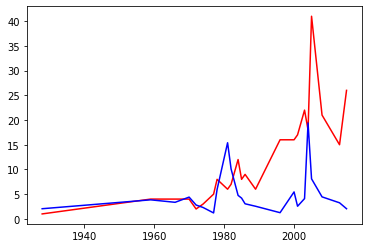

In [136]:
region_17=(region_data_with_pred[region_data_with_pred['Region']==17]).sort_values(by='Year')
y_real=region_17['number of floods']
y_pred=region_17['predicted number of floods']
y_error=region_17['prediction error']
x_year=region_17['Year']
plt.plot(x_year, y_real, 'r')  
plt.plot(x_year, y_pred, 'b') 
#plt.plot(x_year, y_error, 'g')
plt.show()

#### Western Asia

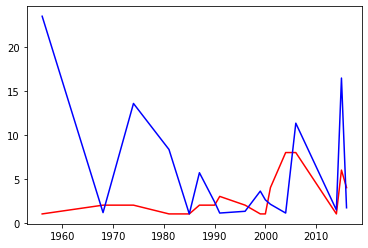

In [137]:
region_17=(region_data_with_pred[region_data_with_pred['Region']==20]).sort_values(by='Year')
y_real=region_17['number of floods']
y_pred=region_17['predicted number of floods']
y_error=region_17['prediction error']
x_year=region_17['Year']
plt.plot(x_year, y_real, 'r')  
plt.plot(x_year, y_pred, 'b') 
#plt.plot(x_year, y_error, 'g')
plt.show()

#### Eastern Europe